In [1]:
import pandas as pd
data = pd.read_csv("Neural Network/CTU-13-Dataset/CTU-13-Dataset/1/capture20110810.binetflow")
data['Label'] = data.Label.str.contains("Botnet")

In [3]:
data.columns

Index(['StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr',
       'Dport', 'State', 'sTos', 'dTos', 'TotPkts', 'TotBytes', 'SrcBytes',
       'Label'],
      dtype='object')

In [4]:
import LoadData
import DataPreparation
import pickle
file = open('flowdata.pickle', 'rb')
data  = pickle.load(file, encoding='latin1')

In [5]:
Xdata = data[0]
Ydata =  data[1]
XdataT = data[2]
YdataT = data[3]

In [6]:
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.naive_bayes import *
from sklearn.neighbors import *

In [7]:
DataPreparation.Prepare(Xdata,Ydata,XdataT,YdataT)

<Prepare(Thread-6, initial)>

Modelo de árvore de decisão:

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Dividindo os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size=0.2, random_state=42)

# Balanceando as classes usando undersampling
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Ajustando hiperparâmetros com validação cruzada
params = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
clf = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5)

# Medindo o tempo de processamento do treinamento do modelo
start_time = time.time()
clf.fit(X_train_resampled, y_train_resampled)
end_time = time.time()

# Calculando o tempo de processamento
processing_time = end_time - start_time

# Fazendo previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimindo as métricas
print("Acuracia:", accuracy)
print("Precisao:", precision)
print("Sensitividade:", recall)
print("F1-Score:", f1)
print("Tempo de processamento:", round(processing_time, 2), "segundos")

#armazenando as métricas m variáveis
ad_acuracia = round(accuracy * 100, 2)
ad_precisao = round(precision * 100, 2)
ad_sensitividade = round(recall * 100, 2)
ad_f1score = round(f1 * 100, 2)
ad_time = round(processing_time, 2)

Acuracia: 0.9996250468691413
Precisao: 0.9992563212692117
Sensitividade: 1.0
F1-Score: 0.999628022318661
Tempo de processamento: 5.45 segundos


Modelo de regressão logística :

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# Pré-processamento de dados
scaler = StandardScaler()
Xdata = scaler.fit_transform(Xdata)
XdataT = scaler.transform(XdataT)

# Seleção de recursos
selector = SelectKBest(f_classif, k='all')
Xdata = selector.fit_transform(Xdata, Ydata)
XdataT = selector.transform(XdataT)

# Ajuste de hiperparâmetros
pipeline = Pipeline([
    ('clf', LogisticRegression())
])

parameters = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

clf = GridSearchCV(pipeline, parameters, cv=5)

# Medindo o tempo de processamento do treinamento do modelo
start_time = time.time()
clf.fit(Xdata, Ydata)
end_time = time.time()

# Calculando o tempo de processamento
processing_time = end_time - start_time

# Avaliação do modelo
Score = clf.score(XdataT, YdataT)
Prediction = clf.predict(XdataT)
precision = precision_score(YdataT, Prediction)
recall = recall_score(YdataT, Prediction)
f1 = f1_score(YdataT, Prediction)

#métricas
print("Acuracia:", round(Score * 100, 2), "%")
print("Precisao:", round(precision * 100, 2), "%")
print("Sensitividade:", round(recall * 100, 2), "%")
print("F1-score:", round(f1 * 100, 2), "%")
print("Tempo de processamento:", round(processing_time, 2), "segundos")

rl_acuracia = round(Score * 100, 2)
rl_precisao = round(precision * 100, 2)
rl_sensitividade = round(recall * 100, 2)
rl_f1score = round(f1 * 100, 2)
rl_time = round(processing_time, 2)

Acuracia: 96.83 %
Precisao: 94.14 %
Sensitividade: 99.88 %
F1-score: 96.92 %
Tempo de processamento: 4.56 segundos


Modelo Gaussiano Naive Bayes :

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import time

# Pré-processamento de dados
scaler = StandardScaler()
Xdata = scaler.fit_transform(Xdata)
XdataT = scaler.transform(XdataT)

# Seleção de recursos
selector = SelectKBest(f_classif, k='all')
Xdata = selector.fit_transform(Xdata, Ydata)
XdataT = selector.transform(XdataT)

# Ajuste de hiperparâmetros
pipeline = Pipeline([
    ('clf', GaussianNB())
])

parameters = {
    'clf__var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
}

clf = GridSearchCV(pipeline, parameters, cv=5)

# Medindo o tempo de processamento do treinamento do modelo
start_time = time.time()
clf.fit(Xdata, Ydata)
end_time = time.time()

# Calculando o tempo de processamento
processing_time = end_time - start_time

# Avaliação do modelo
Prediction = clf.predict(XdataT)
Score = clf.score(XdataT, YdataT)
precision = precision_score(YdataT, Prediction)
recall = recall_score(YdataT, Prediction)
f1 = f1_score(YdataT, Prediction)

#métricas
print("Acuracia:", round(Score * 100, 2), "%")
print("Precisao:", round(precision * 100, 2), "%")
print("Sensitividade:", round(recall * 100, 2), "%")
print("F1-score:", round(f1 * 100, 2), "%")
print("Tempo de processamento:", round(processing_time, 2), "segundos")

nb_acuracia = round(Score * 100, 2)
nb_precisao = round(precision * 100, 2)
nb_sensitividade = round(recall * 100, 2)
nb_f1score = round(f1 * 100, 2)
nb_time = round(processing_time, 2)

Acuracia: 98.19 %
Precisao: 96.63 %
Sensitividade: 99.86 %
F1-score: 98.22 %
Tempo de processamento: 0.76 segundos


Modelo de k-vizinhos mais próximos :

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Criando o classificador
clf = KNeighborsClassifier()

# Treinando o modelo
start_time = time.time()
clf.fit(Xdata, Ydata)
end_time = time.time()

# Calculando o tempo de processamento
processing_time = end_time - start_time

# Fazendo previsões
Prediction = clf.predict(XdataT)

# Calculando as métricas
accuracy = accuracy_score(YdataT, Prediction)
precision = precision_score(YdataT, Prediction)
recall = recall_score(YdataT, Prediction)
f1 = f1_score(YdataT, Prediction)

# Imprimindo as métricas
print("Acuracia:", accuracy)
print("Precisao:", round(precision * 100, 2), "%")
print("Sensibilidade:", round(recall * 100, 2), "%")
print("F1-score:", round(f1 * 100, 2), "%")
print("Tempo de processamento:", round(processing_time, 2), "segundos")

knn_acuracia =  round(accuracy * 100, 2)
knn_precisao = round(precision * 100, 2)
knn_sensitividade = round(recall * 100, 2)
knn_f1score = round(f1 * 100, 2)
knn_time = round(processing_time, 2)

Acuracia: 0.9908018396320736
Precisao: 98.33 %
Sensibilidade: 99.86 %
F1-score: 99.09 %
Tempo de processamento: 0.14 segundos


Modelo de rede neural :

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# normaliza os dados
scaler = StandardScaler()
Xdata_norm = scaler.fit_transform(Xdata)
XdataT_norm = scaler.transform(XdataT)

# reduz a dimensionalidade dos dados
pca = PCA(n_components=5)
Xdata_pca = pca.fit_transform(Xdata_norm)
XdataT_pca = pca.transform(XdataT_norm)

# define a arquitetura da rede neural
model = Sequential()
model.add(Dense(512, input_dim=Xdata_pca.shape[1], activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid", kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))

# compila a rede neural
optimizer = Adam(lr=0.0005, decay=1e-6)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# treina a rede neural
start_time = time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model.fit(Xdata_pca, Ydata, epochs=150, batch_size=64, validation_split=0.2, callbacks=[early_stopping])
end_time = time.time()

# Calculando o tempo de processamento
processing_time = end_time - start_time

# avalia a rede neural
loss, accuracy = model.evaluate(XdataT_pca, YdataT, verbose=0)
Y_pred = model.predict(XdataT_pca)
Y_pred_class = (Y_pred > 0.5).astype(int)
precision = precision_score(YdataT, Y_pred_class)
recall = recall_score(YdataT, Y_pred_class)
f1 = f1_score(YdataT, Y_pred_class)

#métricas
print("Acuracia:", round(accuracy * 100, 2), "%")
print("Precisao:", round(precision * 100, 2), "%")
print("Sensitividade:", round(recall * 100, 2), "%")
print("F1-score:", round(f1 * 100, 2), "%")
print("Tempo de processamento:", round(processing_time, 2), "segundos")

rn_acuracia = round(accuracy * 100, 2)
rn_precisao = round(precision * 100, 2)
rn_sensitividade = round(recall * 100, 2)
rn_f1score = round(f1 * 100, 2)
rn_time = round(processing_time, 2)

Epoch 1/150


D:\Anaconda\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


501/501 [==============================] - 5s 7ms/step - loss: 0.1495 - accuracy: 0.9542 - val_loss: 0.0248 - val_accuracy: 0.9985
Epoch 2/150
501/501 [==============================] - 4s 7ms/step - loss: 0.0871 - accuracy: 0.9769 - val_loss: 0.0145 - val_accuracy: 0.9998
Epoch 3/150
501/501 [==============================] - 3s 7ms/step - loss: 0.0796 - accuracy: 0.9795 - val_loss: 0.0211 - val_accuracy: 0.9990
Epoch 4/150
501/501 [==============================] - 3s 7ms/step - loss: 0.0752 - accuracy: 0.9808 - val_loss: 0.0137 - val_accuracy: 0.9991
Epoch 5/150
501/501 [==============================] - 3s 7ms/step - loss: 0.0727 - accuracy: 0.9816 - val_loss: 0.0166 - val_accuracy: 0.9990
Epoch 6/150
501/501 [==============================] - 3s 7ms/step - loss: 0.0713 - accuracy: 0.9817 - val_loss: 0.0185 - val_accuracy: 0.9995
Epoch 7/150
501/501 [==============================] - 3s 7ms/step - loss: 0.0687 - accuracy: 0.9817 - val_loss: 0.0133 - val_accuracy: 0.9989
Epoch 8/150

Resultados - Acuracia

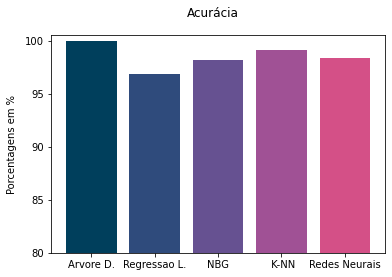

In [28]:
import matplotlib.pyplot as plt

# Dados
dados = [ad_acuracia, rl_acuracia, nb_acuracia, knn_acuracia, rn_acuracia]

# Criando lista de índices para o eixo x
indices = ['Arvore D.', 'Regressao L.', 'NBG', ' K-NN', 'Redes Neurais']

# Criando lista de cores para cada barra
cores = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087']

# Criando figura e eixos
fig, ax = plt.subplots()

# Adicionando barras ao gráfico
ax.bar(indices, dados, color=cores)

# Definindo limites para o eixo y
ax.set_ylim(80, 100.5)

# Definindo valores para o eixo y e ajustando posição do rótulo
ax.set_yticks([80, 85, 90, 95, 100])
ax.yaxis.set_label_coords(-0.1, 0.5)

# Adicionando rótulos aos eixos
ax.set_ylabel('Porcentagens em %')

# Adicionando título
fig.suptitle('Acurácia')

# Exibindo o gráfico
plt.show()

Resultados - Precisão

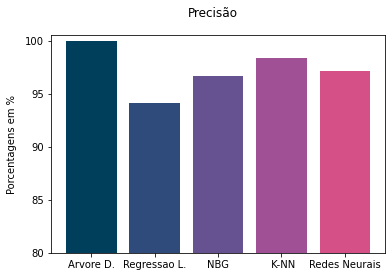

In [30]:
import matplotlib.pyplot as plt

# Dados
dados = [ad_precisao, rl_precisao, nb_precisao, knn_precisao, rn_precisao]

# Criando lista de índices para o eixo x
indices = ['Arvore D.', 'Regressao L.', 'NBG', ' K-NN', 'Redes Neurais']

# Criando lista de cores para cada barra
cores = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087']

# Criando figura e eixos
fig, ax = plt.subplots()

# Adicionando barras ao gráfico
ax.bar(indices, dados, color=cores)

# Definindo limites para o eixo y
ax.set_ylim(80, 100.5)

# Definindo valores para o eixo y e ajustando posição do rótulo
ax.set_yticks([80, 85, 90, 95, 100])
ax.yaxis.set_label_coords(-0.1, 0.5)

# Adicionando rótulos aos eixos
ax.set_ylabel('Porcentagens em %')

# Adicionando título
fig.suptitle('Precisão')

# Exibindo o gráfico
plt.show()

Resultados - Sensitividade

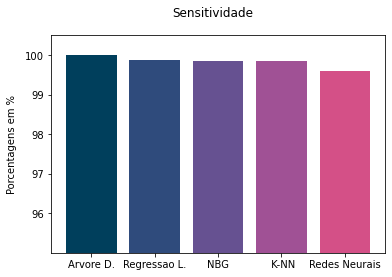

In [33]:
import matplotlib.pyplot as plt

# Dados
dados = [ad_sensitividade, rl_sensitividade, nb_sensitividade, knn_sensitividade, rn_sensitividade]

# Criando lista de índices para o eixo x
indices = ['Arvore D.', 'Regressao L.', 'NBG', ' K-NN', 'Redes Neurais']

# Criando lista de cores para cada barra
cores = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087']

# Criando figura e eixos
fig, ax = plt.subplots()

# Adicionando barras ao gráfico
ax.bar(indices, dados, color=cores)

# Definindo limites para o eixo y
ax.set_ylim(95, 100.5)

# Definindo valores para o eixo y e ajustando posição do rótulo
ax.set_yticks([96, 97, 98, 99, 100])
ax.yaxis.set_label_coords(-0.1, 0.5)

# Adicionando rótulos aos eixos
ax.set_ylabel('Porcentagens em %')

# Adicionando título
fig.suptitle('Sensitividade')

# Exibindo o gráfico
plt.show()

Resultados - F1-Score

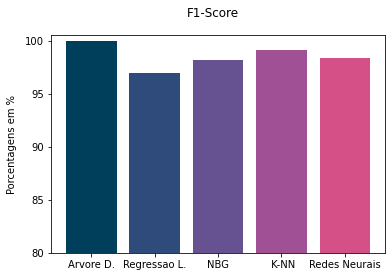

In [35]:
import matplotlib.pyplot as plt

# Dados
dados = [ad_f1score, rl_f1score, nb_f1score, knn_f1score, rn_f1score]

# Criando lista de índices para o eixo x
indices = ['Arvore D.', 'Regressao L.', 'NBG', ' K-NN', 'Redes Neurais']

# Criando lista de cores para cada barra
cores = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087']

# Criando figura e eixos
fig, ax = plt.subplots()

# Adicionando barras ao gráfico
ax.bar(indices, dados, color=cores)

# Definindo limites para o eixo y
ax.set_ylim(80, 100.5)

# Definindo valores para o eixo y e ajustando posição do rótulo
ax.set_yticks([80, 85, 90, 95, 100])
ax.yaxis.set_label_coords(-0.1, 0.5)

# Adicionando rótulos aos eixos
ax.set_ylabel('Porcentagens em %')

# Adicionando título
fig.suptitle('F1-Score')

# Exibindo o gráfico
plt.show()

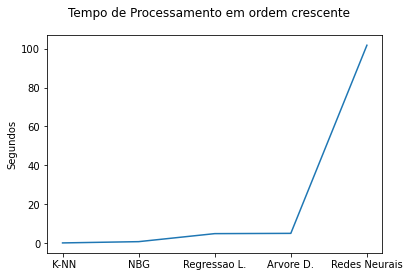

In [42]:
import matplotlib.pyplot as plt

# Dados
dados = [ad_time, rl_time, nb_time, knn_time, rn_time]

# Criando lista de índices para o eixo x em ordem crescente
indices = ['Arvore D.', 'Regressao L.', 'NBG', ' K-NN', 'Redes Neurais']

# Ordenando os dados em ordem crescente
dados, indices = zip(*sorted(zip(dados, indices)))

# Criando figura e eixos
fig, ax = plt.subplots()

# Adicionando linha ao gráfico
ax.plot(indices, dados)

# Definindo rótulos aos eixos
ax.set_ylabel('Segundos')

# Adicionando título
fig.suptitle('Tempo de Processamento em ordem crescente')

# Exibindo o gráfico
plt.show()